In [1]:
import glob
from IPython.display import display
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns 
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [2]:
path_in_train = "../data/raw/train.csv"
path_in_weather = "../data/raw/weather.csv"
path_in_test = "../data/raw/test.csv"

In [3]:
train_df = pd.read_csv(path_in_train)
wea_df = pd.read_csv(path_in_weather)
test_df = pd.read_csv(path_in_test)

In [4]:
train_df

,kind,date,amount,mode_price,area
0,だいこん,20051107,201445,735.0,千葉
1,だいこん,20051108,189660,840.0,千葉_各地_青森
2,だいこん,20051110,218166,735.0,千葉_各地_青森
3,だいこん,20051111,182624,682.5,千葉_青森
4,だいこん,20051112,220691,682.5,千葉_青森
...,...,...,...,...,...
97777,しめじ,20170526,17231,48.5,新潟_長野
97778,しめじ,20170527,17105,48.5,新潟_長野
97779,しめじ,20170529,12406,48.5,新潟_長野
97780,しめじ,20170530,12320,48.5,新潟_長野


In [5]:
wea_df

,date,mean_temp,max_temp,max_temp_time,min_temp,min_temp_time,sum_rain,sun_time,mean_humid,area
0,20041106,13.1,20.1,2004/11/6 12:50,8.1,2004/11/6 05:31,5.0,1.6,77.0,青森
1,20041107,9.6,12.5,2004/11/7 13:40,5.4,2004/11/7 22:17,0.0,4.1,63.0,青森
2,20041108,9.0,15.5,2004/11/8 12:51,3.2,2004/11/8 06:28,0.0,8.9,72.0,青森
3,20041109,12.2,17.7,2004/11/9 14:40,5.7,2004/11/9 02:49,1.5,1.2,85.0,青森
4,20041110,11.6,16.4,2004/11/10 14:42,6.9,2004/11/10 06:23,0.0,7.5,89.0,青森
...,...,...,...,...,...,...,...,...,...,...
204315,20220426,21.3,23.6,2022/4/26 14:27,17.9,2022/4/26 04:17,2.5,0.0,89.0,東京
204316,20220427,23.0,27.7,2022/4/27 13:12,18.9,2022/4/28 0:00,0.5,1.6,79.0,東京
204317,20220428,16.9,21.1,2022/4/28 15:03,14.2,2022/4/28 22:40,0.0,5.5,57.0,東京
204318,20220429,12.9,16.4,2022/4/29 09:21,9.0,2022/4/29 23:55,40.0,0.2,86.0,東京


In [6]:
test_df

,kind,date,area
0,だいこん,20220502,千葉_各地_青森
1,だいこん,20220506,千葉_各地_青森
2,だいこん,20220507,千葉_各地_青森
3,だいこん,20220509,千葉_各地_青森
4,だいこん,20220510,千葉_各地_青森
...,...,...,...
315,ミニトマト,20220526,各地_愛知
316,ミニトマト,20220527,各地_愛知
317,ミニトマト,20220528,各地_愛知
318,ミニトマト,20220530,各地_愛知


# 文字列をdatetime64[ns]型（Timestamp型）に変換

In [7]:
for df in (train_df, wea_df, test_df):
    df['date'] = pd.to_datetime(df["date"], format="%Y%m%d")
    
for i in ("max_temp_time", "min_temp_time"):
    wea_df.loc[:, i] = pd.to_datetime(wea_df[i], format="%Y/%m/%d %H:%M")

year month列を追加

In [8]:
train_df["year"] = train_df["date"].dt.year
train_df["month"] = train_df["date"].dt.month
test_df["year"] = test_df["date"].dt.year
test_df["month"] = test_df["date"].dt.month

In [9]:
train_df["date"][0].year

2005

# 型、項目数、欠損値
areaの項目数がかなり多いしテストと訓練データで大きく違う

In [10]:
dtypes = []
val_counts_train = []
val_counts_test = []
isnull_train = []
isnull_test = []
isnull_train_ratio = 100 * train_df.isnull().sum() / len(train_df)
isnull_test_ratio = 100 * test_df.isnull().sum() / len(test_df)
for col in test_df.columns:
    dtypes.append(str(train_df[col].dtype))
    val_counts_train.append(len(train_df[col].value_counts()))
    val_counts_test.append(len(test_df[col].value_counts()))
    isnull_train.append(isnull_train_ratio[col])
    isnull_test.append(isnull_test_ratio[col])

In [11]:
inds = ["型", "val_counts_train", "val_counts_test", "NaN率_train", "NaN率_test"]
df_eda = pd.DataFrame([dtypes, val_counts_train, val_counts_test, isnull_train, isnull_test], columns=test_df.columns, index=inds).T
df_eda.query("val_counts_train > 1")

,型,val_counts_train,val_counts_test,NaN率_train,NaN率_test
kind,object,44,16,0.0,0.0
date,datetime64[ns],4379,20,0.0,0.0
area,object,266,15,0.0,0.0
year,int64,18,1,0.0,0.0
month,int64,12,1,0.0,0.0


In [12]:
dtypes = []
val_counts_weather = []
isnull_weather = []
isnull_weather_ratio = 100 * wea_df.isnull().sum() / len(wea_df)
for col in wea_df.columns:
    dtypes.append(str(wea_df[col].dtype))
    val_counts_weather.append(len(wea_df[col].value_counts()))
    isnull_weather.append(isnull_weather_ratio[col])
    
inds = ["型", "val_counts_weather", "NaN率_weather"]
df_eda = pd.DataFrame([dtypes, val_counts_weather, isnull_weather], columns=wea_df.columns, index=inds).T
df_eda.query("val_counts_weather > 1")

,型,val_counts_weather,NaN率_weather
date,datetime64[ns],6385,0.0
mean_temp,float64,481,0.17962
max_temp,float64,485,0.17962
max_temp_time,datetime64[ns],193875,0.17962
min_temp,float64,522,0.18011
min_temp_time,datetime64[ns],179559,0.18011
sum_rain,float64,432,0.180599
sun_time,float64,147,0.211433
mean_humid,float64,84,0.194792
area,object,32,0.0


# 卸売データ

In [13]:
train_df.describe()

,amount,mode_price,year,month
count,97782.000000,97782.000000,97782.000000,97782.000000
mean,87095.257246,1341.207081,2013.550889,6.604784
std,84438.195701,1304.031597,4.728611,3.481086
min,1.000000,18.500000,2005.000000,1.000000
25%,21664.250000,227.000000,2009.000000,4.000000
50%,58335.500000,1242.000000,2014.000000,7.000000
75%,128100.750000,1890.000000,2018.000000,10.000000
max,965216.000000,25920.000000,2022.000000,12.000000


In [14]:
train_df.dtypes

kind                  object
date          datetime64[ns]
amount                 int64
mode_price           float64
area                  object
year                   int64
month                  int64
dtype: object

## area

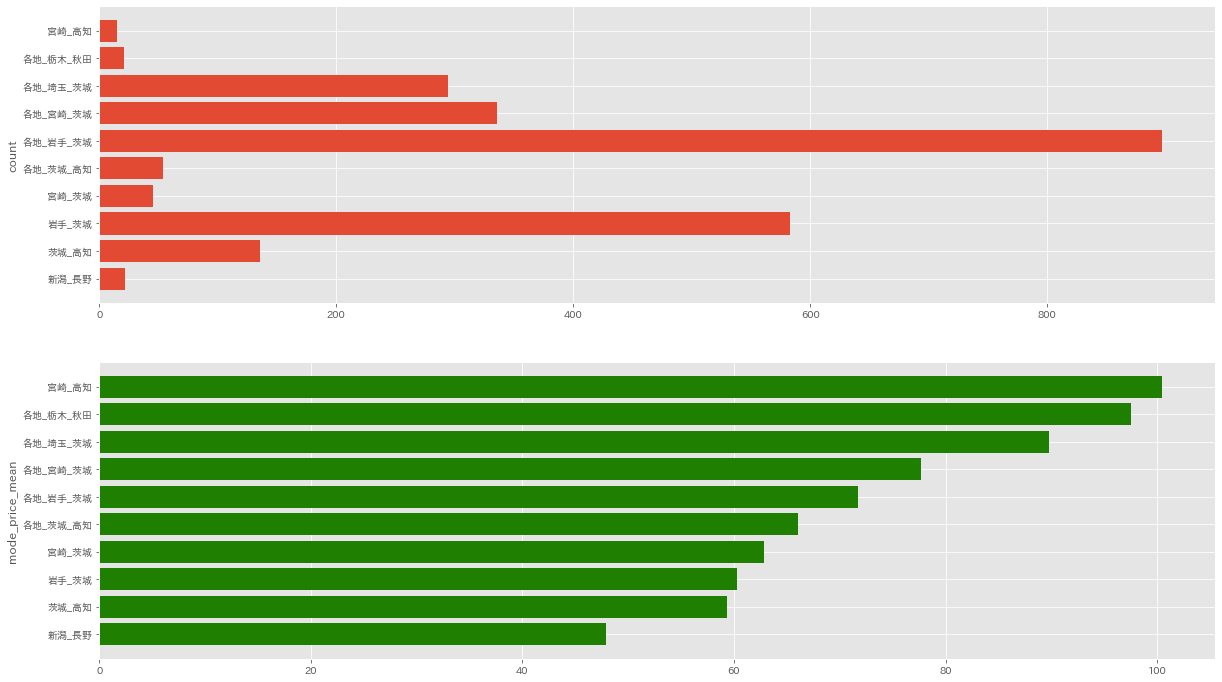

In [15]:
workclass_pivot = train_df.pivot_table(index="area", values="mode_price", aggfunc=["mean","count"]).sort_values(('mean', 'mode_price'))
# ..,margins=True, margins_name="total") # 総計を追加
# categoryは.sort_values(('mean', 'state'))して並び替えて使用する、数値は並び替えない)

workclass_pivot = workclass_pivot.iloc[:10,]

# 横向きはbarh
fig, axes = plt.subplots(2, 1, figsize=(20, 12))
axes.ravel()[0].barh(workclass_pivot.index, workclass_pivot[("count","mode_price")]) 
axes.ravel()[0].set_ylabel("count")
axes.ravel()[1].barh(workclass_pivot.index, workclass_pivot[("mean","mode_price")], color="#1E7F00") #(分ける要素, 高さ)
axes.ravel()[1].set_ylabel("mode_price_mean")
plt.show()

## kind
野菜ごとに大きく価格が異なっており、重要な変数として機能する

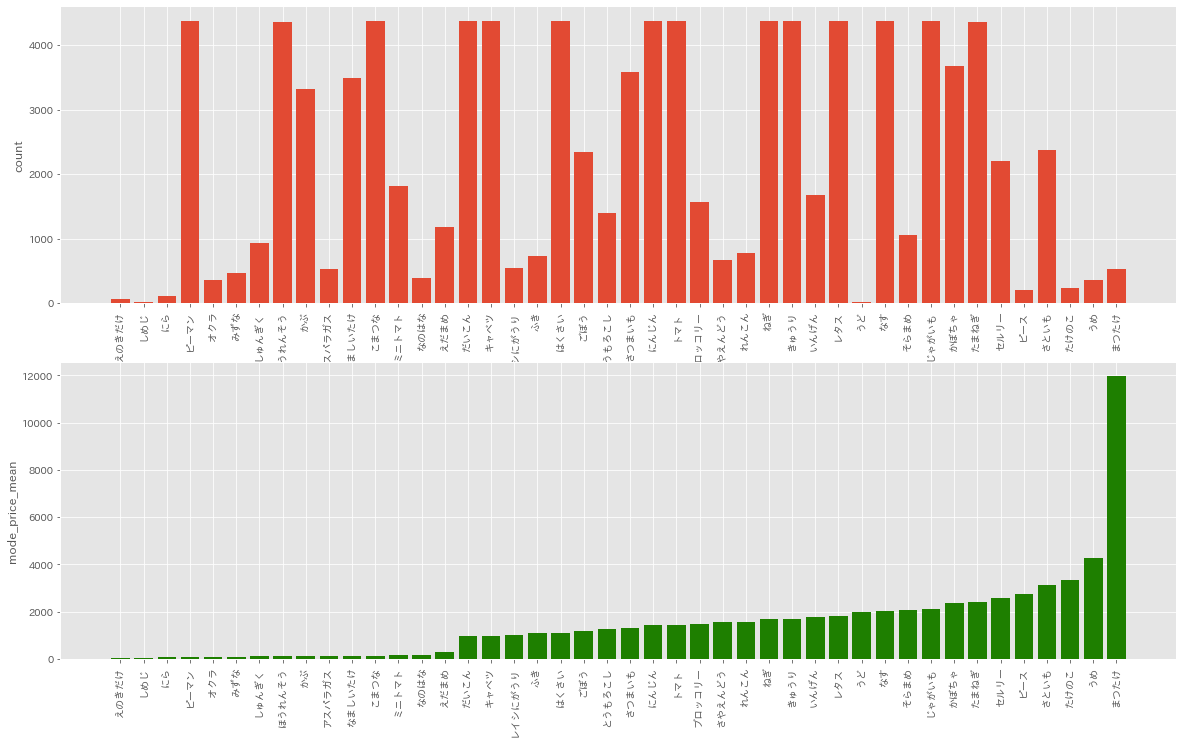

In [16]:
kind_pivot = train_df.pivot_table(index="kind", values="mode_price", aggfunc=["mean","count"]).sort_values(('mean', 'mode_price'))
# ..,margins=True, margins_name="total") # 総計を追加
# categoryは.sort_values(('mean', 'state'))して並び替えて使用する、数値は並び替えない)

# 横向きはbarh
fig, axes = plt.subplots(2, 1, figsize=(20, 12))
axes.ravel()[0].bar(kind_pivot.index, kind_pivot[("count","mode_price")]) 
axes.ravel()[0].set_ylabel("count")
axes.ravel()[0].tick_params(axis="x", labelrotation=90)
axes.ravel()[1].bar(kind_pivot.index, kind_pivot[("mean","mode_price")], color="#1E7F00") #(分ける要素, 高さ)
axes.ravel()[1].set_ylabel("mode_price_mean")
axes.ravel()[1].tick_params(axis="x", labelrotation=90)
plt.show()

### trainとtestに野菜種別の差異あり

trainにしかないものを削除するとそれ以外のデータ喪失するので削除しない方がいいのでは

In [17]:
train_df['kind'].unique(), test_df['kind'].unique()

(array(['だいこん', 'かぶ', 'にんじん', 'ごぼう', 'れんこん', 'キャベツ', 'レタス', 'はくさい', 'こまつな',
        'ほうれんそう', 'ねぎ', 'しゅんぎく', 'ブロッコリー', 'きゅうり', 'かぼちゃ', 'なす', 'トマト',
        'ピーマン', 'じゃがいも', 'さつまいも', 'さといも', 'たまねぎ', 'なましいたけ', 'セルリー',
        'さやえんどう', 'なのはな', 'たけのこ', 'ふき', 'うど', 'そらまめ', 'アスパラガス', 'ピース',
        'とうもろこし', 'いんげん', 'えだまめ', 'うめ', 'まつたけ', 'オクラ', 'レイシにがうり', 'みずな',
        'ミニトマト', 'にら', 'えのきだけ', 'しめじ'], dtype=object),
 array(['だいこん', 'にんじん', 'キャベツ', 'レタス', 'はくさい', 'こまつな', 'ほうれんそう', 'ねぎ',
        'きゅうり', 'トマト', 'ピーマン', 'じゃがいも', 'なましいたけ', 'セルリー', 'そらまめ', 'ミニトマト'],
       dtype=object))

### 月別のレコード数を表示

毎日レコードがあるわけではない

市場に野菜が出ていない可能性もありますが、全ての野菜について取引が行われていない場合、市場自体が空いていないと考えられる

<AxesSubplot:xlabel='month', ylabel='kind'>

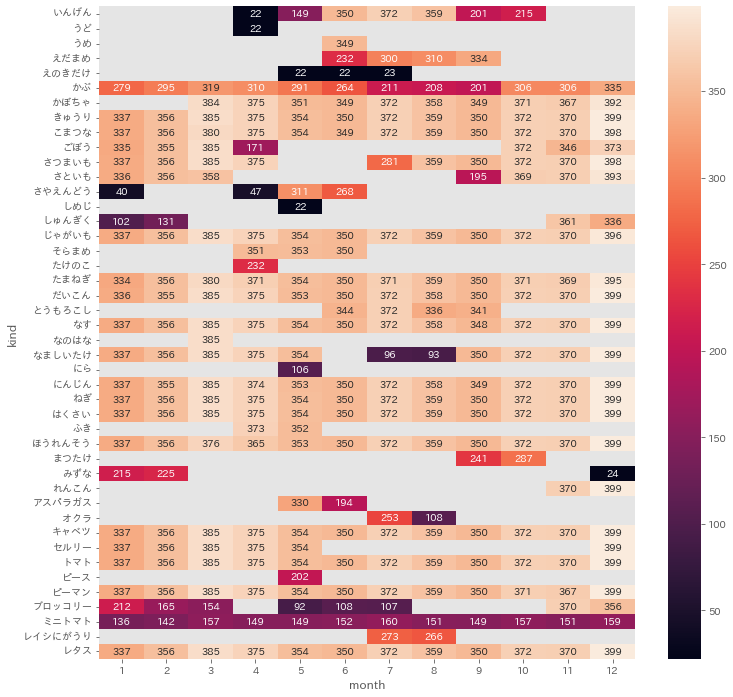

In [18]:
pivot = train_df.pivot_table(index="kind", columns="month", values="mode_price",aggfunc="count")
plt.figure(figsize=(12,12))
sns.heatmap(pivot, annot=True, fmt='n')

### 野菜ごとの時系列推移（価格）

年によって価格が異なる

→ある月の価格は、前年の価格より前月など直近の価格に近いものになっていると思われる

→各年の価格の先行指標となる変数を探す必要がある


In [19]:
train_df["kind"].nunique()

44

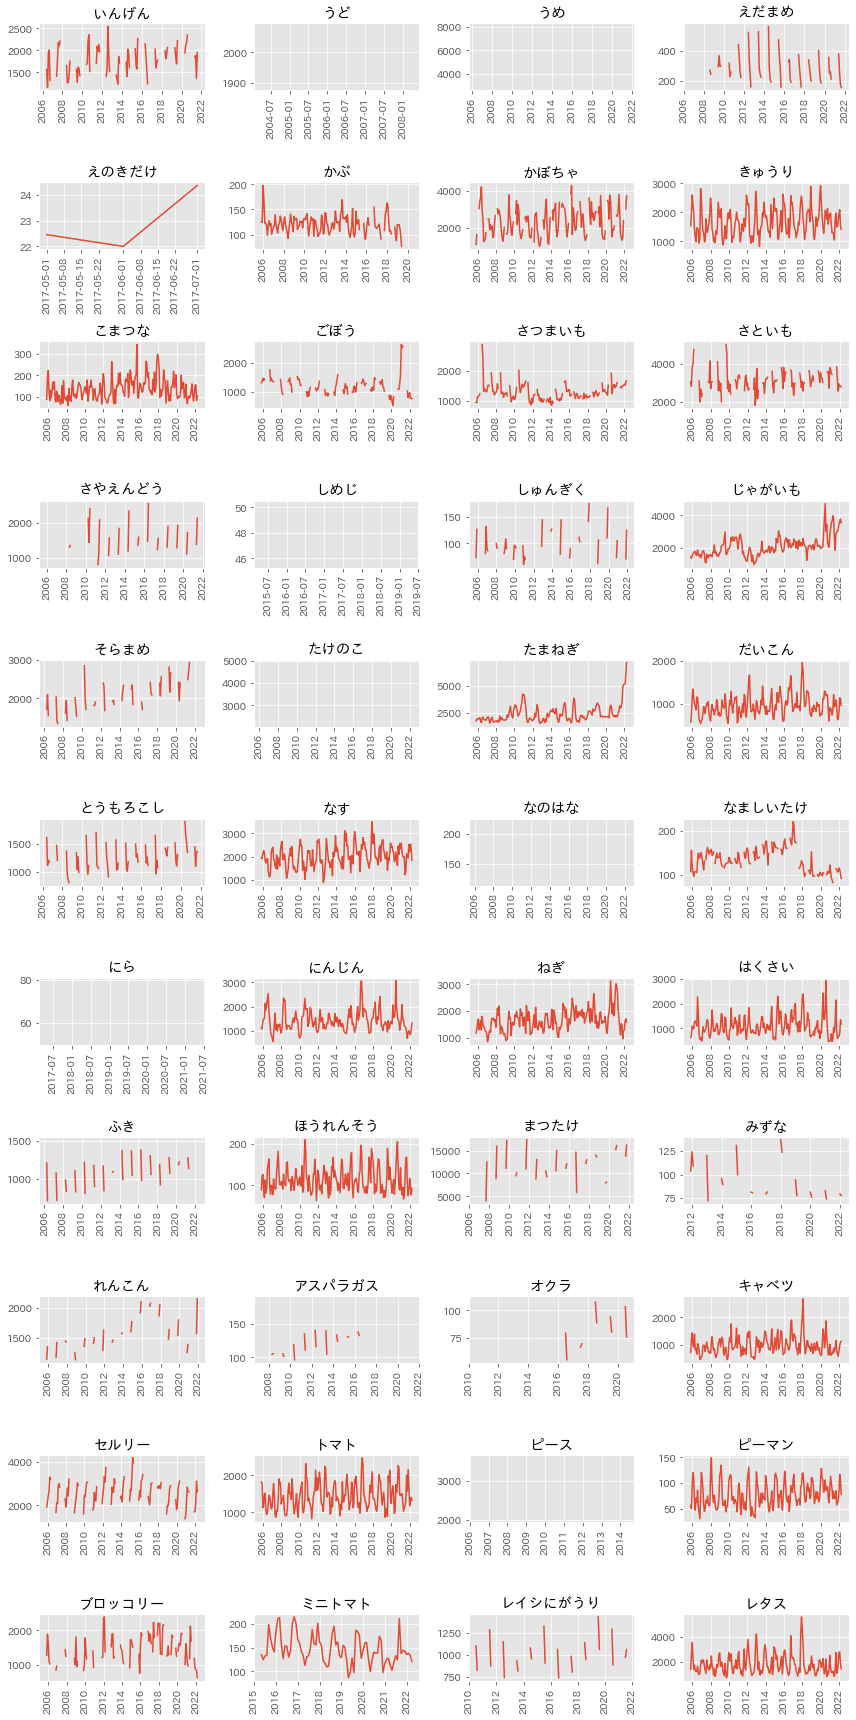

In [20]:
nrow = 11
ncol = 4

pivot = train_df.pivot_table(index=["year","month"],columns="kind",values="mode_price").reset_index()
pivot["date"] = pivot["year"].apply(lambda x :str(x))+"_"+pivot["month"].apply(lambda x :str(x))
pivot["date"] = pd.to_datetime(pivot["date"], format="%Y_%m")

kinds = [i for i in pivot.columns if i not in ("kind","year", "month", "date")]

fig, axes = plt.subplots(nrow, ncol, figsize=(12,24))
for kind,ax in zip(kinds,axes.ravel()):
    date = pivot["date"]
    price = pivot[kind]
    ax.plot(date.to_list(), price.to_list())
    ax.tick_params(axis="x", labelrotation=90)
    ax.set_title(kind)
plt.tight_layout()
plt.show()
plt.close()

# 天気データ

集約統計量

In [21]:
wea_df["year"] = wea_df["date"].apply(lambda x: x.year)
wea_df["month"] = wea_df["date"].apply(lambda x: x.month)

In [22]:
# area,year,monthで集計

agg_cols = ['mean_temp', 'max_temp', 'min_temp', 'sum_rain', 'sun_time', 'mean_humid']
# reset_index():groupbyしたものをDataFrameに変換する
gb_df = wea_df.groupby(['area', 'year', 'month'])[agg_cols].agg(['mean','max','min']).reset_index()

# カラム名を整える
new_cols = []
for col1, col2 in gb_df.columns:
    if col2:
        new_cols.append(col2+'_'+col1)
    else:
        new_cols.append(col1)
gb_df.columns = new_cols

gb_df

,area,year,month,mean_mean_temp,max_mean_temp,min_mean_temp,mean_max_temp,max_max_temp,min_max_temp,mean_min_temp,max_min_temp,min_min_temp,mean_sum_rain,max_sum_rain,min_sum_rain,mean_sun_time,max_sun_time,min_sun_time,mean_mean_humid,max_mean_humid,min_mean_humid
0,仙台,2004,11,11.256000,16.4,4.4,15.196000,19.3,7.5,7.152000,12.0,1.1,1.340000,20.0,0.0,4.436000,9.4,0.0,68.320000,93.0,45.0
1,仙台,2004,12,5.422581,13.3,-1.2,9.212903,21.6,0.4,1.825806,8.4,-4.4,2.048387,42.0,0.0,4.441935,8.9,0.0,64.225806,86.0,46.0
2,仙台,2005,1,1.590323,5.4,-2.0,5.077419,11.1,0.6,-1.809677,0.9,-5.6,2.000000,44.5,0.0,3.938710,9.4,0.0,69.709677,92.0,51.0
3,仙台,2005,2,0.828571,3.0,-1.3,4.335714,8.6,0.3,-2.221429,0.2,-4.7,2.000000,25.0,0.0,4.392857,9.0,0.0,68.750000,89.0,48.0
4,仙台,2005,3,4.061290,8.2,-1.2,8.332258,13.5,0.1,0.225806,5.4,-4.6,1.903226,28.0,0.0,5.522581,10.8,0.0,63.000000,89.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6715,鹿児島,2021,12,10.451613,14.5,3.9,15.135484,19.8,5.9,6.261290,11.6,0.2,1.548387,41.0,0.0,5.693548,9.8,0.0,67.516129,90.0,53.0
6716,鹿児島,2022,1,9.012903,14.4,6.1,13.500000,17.6,9.1,5.341935,12.7,0.2,1.451613,32.5,0.0,4.429032,10.0,0.0,63.903226,91.0,48.0
6717,鹿児島,2022,2,8.314286,13.8,5.2,12.721429,18.3,8.5,4.932143,11.7,1.2,0.821429,10.0,0.0,4.642857,10.7,0.0,62.428571,83.0,47.0
6718,鹿児島,2022,3,14.361290,20.0,9.4,19.477419,25.7,12.1,10.032258,17.1,4.1,6.000000,82.5,0.0,4.958065,11.1,0.0,71.064516,88.0,49.0


全国平均を算出：各地＝全国と解釈

In [23]:
agg_cols = [i for i in gb_df.columns if i not in ["year","month","area"]]
tmp_df = gb_df.groupby(["year","month"])[agg_cols].agg(["mean"]).reset_index()

new_cols = []
for col1,col2 in tmp_df.columns:
    new_cols.append(col1)
tmp_df.columns = new_cols

tmp_df["area"] = "全国"
tmp_df = tmp_df[gb_df.columns]
tmp_df

,area,year,month,mean_mean_temp,max_mean_temp,min_mean_temp,mean_max_temp,max_max_temp,min_max_temp,mean_min_temp,max_min_temp,min_min_temp,mean_sum_rain,max_sum_rain,min_sum_rain,mean_sun_time,max_sun_time,min_sun_time,mean_mean_humid,max_mean_humid,min_mean_humid
0,全国,2004,11,13.046750,18.481250,8.406250,17.580375,22.950000,11.609375,9.046250,15.787500,4.287500,3.456875,42.578125,0.0,5.446625,9.478125,0.000000,67.877500,87.96875,49.59375
1,全国,2004,12,8.011492,14.731250,1.662500,12.469456,21.259375,4.171875,4.086089,10.281250,-1.271875,3.554940,54.796875,0.0,4.952319,9.059375,0.000000,65.214718,85.18750,48.43750
2,全国,2005,1,4.076210,7.975000,0.912500,8.123286,14.028125,3.909375,0.388609,4.356250,-3.300000,2.198085,26.328125,0.0,4.467498,8.940625,0.006250,64.005040,84.96875,46.59375
3,全国,2005,2,4.199888,9.156250,0.143750,8.256920,14.600000,2.921875,0.549442,5.568750,-3.390625,2.989955,25.125000,0.0,4.314951,9.321875,0.000000,63.796875,88.56250,46.25000
4,全国,2005,3,7.202218,12.068750,1.228125,11.891431,18.268750,4.409375,2.865927,8.950000,-2.656250,3.122984,29.046875,0.0,5.416835,10.934375,0.000000,61.677419,87.09375,41.53125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,全国,2021,12,6.865927,12.515625,0.768750,11.254234,17.865625,3.565625,2.880746,8.868750,-2.609375,2.730847,30.562500,0.0,5.176210,9.109375,0.062500,68.081653,89.53125,49.62500
206,全国,2022,1,4.046069,7.256250,0.859375,8.298690,12.337500,3.906250,0.276109,4.681250,-3.653125,1.477319,20.171875,0.0,5.263206,9.231250,0.003125,64.570565,89.18750,49.43750
207,全国,2022,2,4.209933,8.478125,0.787500,8.639286,14.621875,3.737500,0.331696,4.337500,-3.053125,1.676897,17.187500,0.0,5.717634,10.218750,0.012500,62.570312,87.65625,46.65625
208,全国,2022,3,9.924496,15.990625,4.509375,15.028427,22.528125,7.868750,5.475907,11.756250,0.087500,3.296371,38.281250,0.0,5.885484,11.046875,0.009375,66.190524,89.40625,43.00000


# データを連結

In [24]:
# 天気データ:都道府県＋全国
wea_df = pd.concat([gb_df, tmp_df])

In [25]:
# 卸売データ：訓練データ＋テストデータ
all_df = pd.concat([train_df, test_df])

In [26]:
# 卸売データ＋天候データ

In [27]:
# 卸売データのエリア
area_pairs = all_df["area"].unique()

yasai_areas = set()

for area_pair in area_pairs:
    areas = area_pair.split("_")
    yasai_areas = (yasai_areas | set(areas)) # 論理和
    
yasai_areas

{'アメリカ',
 'カナダ',
 'トンガ',
 'ニュージーランド',
 'メキシコ',
 '中国',
 '佐賀',
 '兵庫',
 '北海道',
 '千葉',
 '各地',
 '和歌山',
 '埼玉',
 '宮城',
 '宮崎',
 '山形',
 '山梨',
 '岩手',
 '徳島',
 '愛媛',
 '愛知',
 '新潟',
 '東京',
 '栃木',
 '沖縄',
 '熊本',
 '神奈川',
 '福岡',
 '福島',
 '秋田',
 '群馬',
 '茨城',
 '長崎',
 '長野',
 '青森',
 '静岡',
 '香川',
 '高知',
 '鹿児島'}

In [28]:
# 天候データのエリア
wea_areas = wea_df["area"].unique()
wea_areas

array(['仙台', '佐賀', '前橋', '千葉', '名古屋', '和歌山', '宇都宮', '宮崎', '山形', '帯広',
       '徳島', '新潟', '東京', '松山', '横浜', '水戸', '浜松', '熊本', '熊谷', '甲府', '盛岡',
       '神戸', '福岡', '福島', '秋田', '那覇', '長崎', '長野', '青森', '高松', '高知', '鹿児島',
       '全国'], dtype=object)

In [29]:
# マッピングのための辞書を作成
area_map = {}
update_area_map = {
    '岩手':'盛岡','宮城':'仙台','静岡':'浜松','沖縄':'那覇','神奈川':'横浜','愛知':'名古屋','茨城':'水戸','北海道':'帯広','各地':'全国',
    '兵庫':'神戸','香川':'高松','埼玉':'熊谷','国内':'全国','山梨':'甲府','栃木':'宇都宮','群馬':'前橋','愛媛':'松山'
}

for yasai_area in yasai_areas:
    if (yasai_area in wea_areas):
        area_map[yasai_area] = yasai_area
    elif (yasai_area in update_area_map):
        area_map[yasai_area] = update_area_map[yasai_area]
    else:
        area_map[yasai_area] = "全国"
        
area_map

{'東京': '東京',
 '佐賀': '佐賀',
 '福島': '福島',
 'メキシコ': '全国',
 '北海道': '帯広',
 'アメリカ': '全国',
 'トンガ': '全国',
 '和歌山': '和歌山',
 '熊本': '熊本',
 '秋田': '秋田',
 '徳島': '徳島',
 '静岡': '浜松',
 '岩手': '盛岡',
 '宮崎': '宮崎',
 '兵庫': '神戸',
 '山梨': '甲府',
 '茨城': '水戸',
 '福岡': '福岡',
 '千葉': '千葉',
 '栃木': '宇都宮',
 '各地': '全国',
 '群馬': '前橋',
 '新潟': '新潟',
 '香川': '高松',
 '高知': '高知',
 '愛媛': '松山',
 '沖縄': '那覇',
 '中国': '全国',
 '青森': '青森',
 'カナダ': '全国',
 '山形': '山形',
 '長崎': '長崎',
 '埼玉': '熊谷',
 '宮城': '仙台',
 '愛知': '名古屋',
 'ニュージーランド': '全国',
 '鹿児島': '鹿児島',
 '神奈川': '横浜',
 '長野': '長野'}

In [30]:
all_df["area"] = all_df["area"].apply(lambda x: "_".join([area_map[i] for i in x.split("_")]))
all_df

,kind,date,amount,mode_price,area,year,month
0,だいこん,2005-11-07,201445.0,735.0,千葉,2005,11
1,だいこん,2005-11-08,189660.0,840.0,千葉_全国_青森,2005,11
2,だいこん,2005-11-10,218166.0,735.0,千葉_全国_青森,2005,11
3,だいこん,2005-11-11,182624.0,682.5,千葉_青森,2005,11
4,だいこん,2005-11-12,220691.0,682.5,千葉_青森,2005,11
...,...,...,...,...,...,...,...
315,ミニトマト,2022-05-26,NaN,NaN,全国_名古屋,2022,5
316,ミニトマト,2022-05-27,NaN,NaN,全国_名古屋,2022,5
317,ミニトマト,2022-05-28,NaN,NaN,全国_名古屋,2022,5
318,ミニトマト,2022-05-30,NaN,NaN,全国_名古屋,2022,5


In [31]:
# 天候データ

In [32]:
# 複数エリアに跨る場合はそれらの平均を取る

In [33]:
area_pairs = all_df["area"].unique()

In [34]:
target_cols = [i for i in wea_df.columns if i != "area"]

In [35]:
area_pair_dfs = []

for area_pair in area_pairs:
    areas = area_pair.split("_")
    # 全ての値が０のDFを作成
    base_tmp_df = pd.DataFrame(np.zeros(wea_df[wea_df["area"]=="千葉"][target_cols].shape), columns=target_cols)
    for area in areas:
        tmp_df = wea_df[wea_df["area"]==area].reset_index(drop=True)[target_cols]
        base_tmp_df = base_tmp_df.add(tmp_df)
    base_tmp_df /= len(areas)
    base_tmp_df["area"] = area_pair
    area_pair_dfs.append(base_tmp_df)

In [36]:
area_pair_df = pd.concat(area_pair_dfs)
area_pair_df

,year,month,mean_mean_temp,max_mean_temp,min_mean_temp,mean_max_temp,max_max_temp,min_max_temp,mean_min_temp,max_min_temp,min_min_temp,mean_sum_rain,max_sum_rain,min_sum_rain,mean_sun_time,max_sun_time,min_sun_time,mean_mean_humid,max_mean_humid,min_mean_humid,area
0,2004.0,11.0,14.596000,19.30,9.60,18.340000,22.20,12.40,11.228000,17.40,6.40,5.840000,87.00,0.0,5.084000,9.50,0.0,71.760000,93.0,43.0,千葉
1,2004.0,12.0,9.641935,19.00,2.20,13.564516,24.30,3.80,6.138710,11.50,0.90,2.435484,26.00,0.0,5.509677,9.40,0.0,58.612903,86.0,37.0,千葉
2,2005.0,1.0,6.277419,13.10,3.10,10.461290,17.20,5.20,2.522581,6.40,-0.50,3.338710,66.50,0.0,6.612903,9.80,0.0,54.838710,89.0,32.0,千葉
3,2005.0,2.0,5.960714,12.00,3.30,9.864286,15.40,5.10,2.060714,4.60,-0.40,1.910714,11.50,0.0,5.225000,9.70,0.0,55.714286,93.0,31.0,千葉
4,2005.0,3.0,8.800000,13.70,1.60,13.122581,18.40,3.60,4.596774,10.00,0.20,2.612903,22.50,0.0,5.529032,11.30,0.0,59.129032,91.0,31.0,千葉
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2021.0,12.0,3.674194,9.50,-2.35,7.722581,14.60,-0.65,0.106452,6.75,-5.25,6.064516,35.25,0.0,3.033871,8.55,0.0,82.064516,97.5,63.5,新潟_長野
206,2022.0,1.0,0.517742,4.20,-2.00,3.796774,8.20,0.80,-2.572581,1.65,-6.90,2.669355,16.75,0.0,3.366129,8.35,0.0,78.548387,93.0,63.5,新潟_長野
207,2022.0,2.0,0.883929,4.55,-1.80,4.471429,10.85,-0.50,-2.244643,0.45,-5.35,2.758929,17.00,0.0,3.326786,8.35,0.0,77.892857,92.5,63.0,新潟_長野
208,2022.0,3.0,6.453226,13.40,1.35,11.838710,19.60,4.55,1.927419,9.55,-2.90,2.137097,21.25,0.0,5.272581,10.65,0.0,70.790323,90.5,53.0,新潟_長野


In [ ]:
pd.merge(df_abx, df_acx, on=['a', 'x'], how='left')

# Preprocess


In [37]:
train_df.head()

,kind,date,amount,mode_price,area,year,month
0,だいこん,2005-11-07,201445,735.0,千葉,2005,11
1,だいこん,2005-11-08,189660,840.0,千葉_各地_青森,2005,11
2,だいこん,2005-11-10,218166,735.0,千葉_各地_青森,2005,11
3,だいこん,2005-11-11,182624,682.5,千葉_青森,2005,11
4,だいこん,2005-11-12,220691,682.5,千葉_青森,2005,11


In [38]:
wea_df.head()

,area,year,month,mean_mean_temp,max_mean_temp,min_mean_temp,mean_max_temp,max_max_temp,min_max_temp,mean_min_temp,max_min_temp,min_min_temp,mean_sum_rain,max_sum_rain,min_sum_rain,mean_sun_time,max_sun_time,min_sun_time,mean_mean_humid,max_mean_humid,min_mean_humid
0,仙台,2004,11,11.256000,16.4,4.4,15.196000,19.3,7.5,7.152000,12.0,1.1,1.340000,20.0,0.0,4.436000,9.4,0.0,68.320000,93.0,45.0
1,仙台,2004,12,5.422581,13.3,-1.2,9.212903,21.6,0.4,1.825806,8.4,-4.4,2.048387,42.0,0.0,4.441935,8.9,0.0,64.225806,86.0,46.0
2,仙台,2005,1,1.590323,5.4,-2.0,5.077419,11.1,0.6,-1.809677,0.9,-5.6,2.000000,44.5,0.0,3.938710,9.4,0.0,69.709677,92.0,51.0
3,仙台,2005,2,0.828571,3.0,-1.3,4.335714,8.6,0.3,-2.221429,0.2,-4.7,2.000000,25.0,0.0,4.392857,9.0,0.0,68.750000,89.0,48.0
4,仙台,2005,3,4.061290,8.2,-1.2,8.332258,13.5,0.1,0.225806,5.4,-4.6,1.903226,28.0,0.0,5.522581,10.8,0.0,63.000000,89.0,43.0


In [ ]:
pd.merge(df_abx, df_acx, on=['a', 'x'], how='left')